In [1]:
##################################################################################
# Reference : Lab 3 of MLDM Neural Networks: Multi-Layer Perceptron (MLP) and ROC
##################################################################################

### *Import necessary libraries for data manipulation, preprocessing, modeling, and evaluation*

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, loguniform

# Import sklearn components
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    classification_report
)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### *Loading the diabetes dataset and display basic information about the dataset*

In [3]:
weather = pd.read_csv('weather_final.csv')
# Dataset Shape
print (weather.shape)

(218620, 13)


In [4]:
weather.head()

,RainToday,Humidity3pm,Sunshine,Cloud3pm,Cloud9am,Humidity9am,Rainfall,WindGustSpeed,Temp3pm,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,0,22.0,8.4,7.0,8.0,71.0,0.6,44.0,21.8,13,13,14,0
1,0,25.0,8.4,7.0,8.0,44.0,0.0,44.0,24.3,14,6,15,0
2,0,30.0,8.4,2.0,8.0,38.0,0.0,46.0,23.2,15,13,15,0
3,0,16.0,8.4,7.0,8.0,45.0,0.0,24.0,26.5,4,9,0,0
4,0,33.0,8.4,8.0,7.0,82.0,1.0,41.0,29.7,13,1,7,0


### *Preparing Features*

In [5]:
# Prepare features (X) and target (y)
X = weather.drop(['RainTomorrow'], axis=1)
y = weather['RainTomorrow']

print(X)
print(y)

        RainToday  Humidity3pm  Sunshine  Cloud3pm  Cloud9am  Humidity9am  \
0               0    22.000000  8.400000  7.000000  8.000000    71.000000   
1               0    25.000000  8.400000  7.000000  8.000000    44.000000   
2               0    30.000000  8.400000  2.000000  8.000000    38.000000   
3               0    16.000000  8.400000  7.000000  8.000000    45.000000   
4               0    33.000000  8.400000  8.000000  7.000000    82.000000   
...           ...          ...       ...       ...       ...          ...   
218615          1    90.514187  8.600000  8.000000  8.000000    86.914879   
218616          1    87.464475  8.400000  5.000000  6.000000    92.830594   
218617          0    68.806903  8.400000  5.806903  6.537936   100.000000   
218618          0    58.000000  8.400000  5.000000  3.121131    57.000000   
218619          1    69.389257  1.813254  7.000000  8.000000    91.097314   

         Rainfall  WindGustSpeed    Temp3pm  WindGustDir  WindDir9am  \
0  

In [6]:
# Training and testing data preperation.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Initializing the classifier
classifier = MLPClassifier(
    random_state=0, 
    activation='logistic',
    hidden_layer_sizes=(5,),
    solver='adam',
    max_iter=100
)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
classifier_predict = classifier.predict(X_test)

# Accuracy factors
print('acc for training data: {:.3f}'.format(classifier.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(classifier.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, classifier_predict))

acc for training data: 0.790
acc for test data: 0.789
MLP Classification report:

               precision    recall  f1-score   support

           0       0.77      0.82      0.79     27280
           1       0.81      0.76      0.78     27375

    accuracy                           0.79     54655
   macro avg       0.79      0.79      0.79     54655
weighted avg       0.79      0.79      0.79     54655



## Tuning the parameters to increase efficiency

##### Improve the accuracy of the MLP by tuning the parameters, e.g. increasing the 'hidden_layer_sizes' or 'max_iter'. Below we increase hidden_layer_sizes from 5 to 10.

In [7]:
classifier = MLPClassifier(
    random_state=0, 
    activation='logistic',
    hidden_layer_sizes=(10,),
    solver='adam',
    max_iter=100
)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
classifier_predict = classifier.predict(X_test)

# Print accuracy metrics
print('acc for training data: {:.3f}'.format(classifier.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(classifier.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, classifier_predict))

acc for training data: 0.793
acc for test data: 0.793
MLP Classification report:

               precision    recall  f1-score   support

           0       0.79      0.80      0.79     27280
           1       0.80      0.79      0.79     27375

    accuracy                           0.79     54655
   macro avg       0.79      0.79      0.79     54655
weighted avg       0.79      0.79      0.79     54655



##### increasing max_iter from 100 to 1000

In [8]:
classifier = MLPClassifier(
    random_state=0, 
    activation='logistic',
    hidden_layer_sizes=(10,),
    solver='adam',
    max_iter=1000
)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
classifier_predict = classifier.predict(X_test)

# Print accuracy metrics
print('acc for training data: {:.3f}'.format(classifier.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(classifier.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, classifier_predict))

acc for training data: 0.793
acc for test data: 0.793
MLP Classification report:

               precision    recall  f1-score   support

           0       0.79      0.80      0.79     27280
           1       0.80      0.79      0.79     27375

    accuracy                           0.79     54655
   macro avg       0.79      0.79      0.79     54655
weighted avg       0.79      0.79      0.79     54655



From The above result's it's clear that there is firstly no overfitting in the training dataset. Based on the classification report there is not much noticable change observed between the above 2 tunning 

### *Using ROC curve to improve accuracy*

#### - Standardizing the features to ensure consistent scaling across all variables.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### *- Split the dataset into training and testing sets.*
#### *- Maintain random_state for reproducibility.*

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

#### *- Create a baseline for comparison using random guessing (all probabilities are zero).*

In [11]:
ns_probs = [0 for _ in range(len(y_test))]

### *Training MLP Models*
#### *1. MLP 1: Logistic activation, one hidden layer with 5 neurons, 100 max iterations.*
#### *2. MLP 2: Logistic activation, one hidden layer with 10 neurons, 100 max iterations.*


In [12]:
# Train MLP 1
classifier1 = MLPClassifier(
    random_state=0, 
    activation='logistic', 
    hidden_layer_sizes=(5,), 
    max_iter=100
)
classifier1.fit(X_train, y_train)

# Train MLP 2
classifier2 = MLPClassifier(
    random_state=0, 
    activation='logistic', 
    hidden_layer_sizes=(10,), 
    max_iter=100
)
classifier2.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=100,
              random_state=0)

#### *- Predicting probabilities for both MLP models.*
#### *- Keeping probabilities for the positive outcome only.*

In [13]:
# Predict probabilities
lr_probs1 = classifier1.predict_proba(X_test)[:, 1]
lr_probs2 = classifier2.predict_proba(X_test)[:, 1]

# Calculate AUC scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)

# Print AUC scores
print('Baseline (random guess): ROC AUC=%.3f' % ns_auc)
print('MLP 1 (original): ROC AUC=%.3f' % lr_auc1)
print('MLP 2 (improved): ROC AUC=%.3f' % lr_auc2)

Baseline (random guess): ROC AUC=0.500
MLP 1 (original): ROC AUC=0.879
MLP 2 (improved): ROC AUC=0.886


#### *- Ploting ROC curves for Baseline, MLP 1, and MLP 2.*
#### *- Adding diagonal reference line and adjust the layout for clarity.*

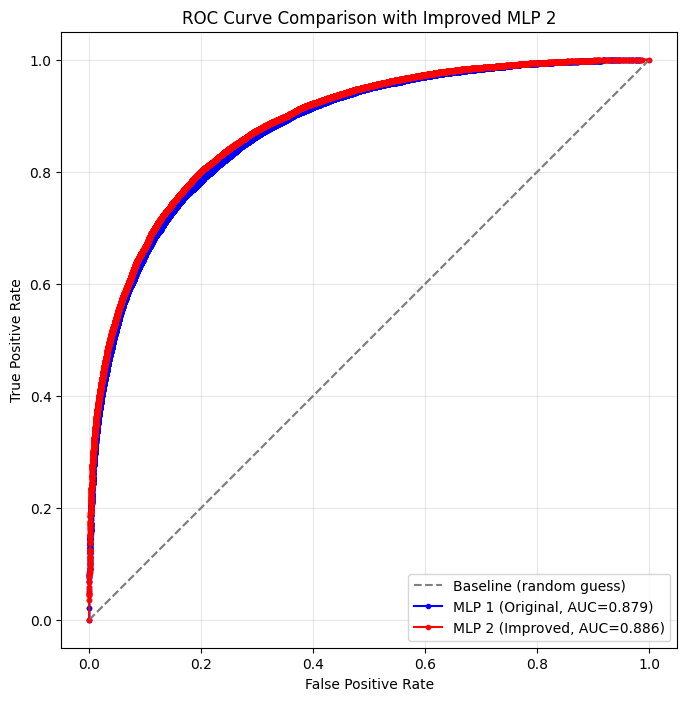

In [14]:
# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)', color='gray')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label=f'MLP 1 (Original, AUC={lr_auc1:.3f})', color='blue')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label=f'MLP 2 (Improved, AUC={lr_auc2:.3f})', color='red')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison with Improved MLP 2')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.5)
plt.axis('square')
plt.show()

#### - Printing accuracy and classification reports for both MLP models.

In [15]:
# Print detailed performance metrics
for name, probs in [('MLP 1', lr_probs1), ('MLP 2', lr_probs2)]:
    predictions = (probs > 0.5).astype(int)
    acc = accuracy_score(y_test, predictions)
    print(f'\nPerformance metrics for {name}:')
    print(f'Accuracy: {acc:.3f}')
    print('\nClassification Report:')
    print(classification_report(y_test, predictions))


Performance metrics for MLP 1:
Accuracy: 0.792

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79     27280
           1       0.79      0.79      0.79     27375

    accuracy                           0.79     54655
   macro avg       0.79      0.79      0.79     54655
weighted avg       0.79      0.79      0.79     54655


Performance metrics for MLP 2:
Accuracy: 0.800

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     27280
           1       0.81      0.79      0.80     27375

    accuracy                           0.80     54655
   macro avg       0.80      0.80      0.80     54655
weighted avg       0.80      0.80      0.80     54655



#### *- Predicting probabilities for both MLP models.*
#### *- Keeping probabilities for the positive outcome only.*

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

### *Defining the Parameter Space*
#### *- Specify the hyperparameter ranges for the Random Search.*
#### *- Include options for hidden layer sizes, activation functions, alpha values, learning rates, and other parameters.*

In [17]:
from scipy.stats import loguniform

param_space = {
    'hidden_layer_sizes': [(n,) for n in [5, 10, 20, 30, 50, 100]],
    'activation': ['logistic', 'relu', 'tanh'],
    'alpha': loguniform(1e-5, 1),
    'learning_rate_init': loguniform(1e-4, 1e-2),
    'max_iter': [500, 1000],
    'batch_size': [32, 64, 128],
    'solver': ['adam']
}

#### *- Defining the base MLPClassifier with a fixed random state for reproducibility.*

In [18]:
base_classifier = MLPClassifier(random_state=0)

### *Perform Random Search*
#### *- Using RandomizedSearchCV to search for the best hyperparameters.*
#### *- Evaluating using ROC-AUC as the scoring metric and 3-fold cross-validation.*
#### *- Limiting the number of iterations to 15 to reduce computation time.*


In [19]:
print("Performing Random Search...")
random_search = RandomizedSearchCV(
    estimator=base_classifier,
    param_distributions=param_space,
    n_iter=15,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=0
)
random_search.fit(X_train, y_train)

Performing Random Search...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3, estimator=MLPClassifier(random_state=0), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'relu',
                                                       'tanh'],
                                        'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16b157290>,
                                        'batch_size': [32, 64, 128],
                                        'hidden_layer_sizes': [(5,), (10,),
                                                               (20,), (30,),
                                                               (50,), (100,)],
                                        'learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16b498150>,
                                        'max_iter': [500, 1000],
                                        'solver': ['adam']},
                   random_state=0, scoring='roc_auc', verbose=1)

#### - Printing the best parameters and the best cross-validation score from Random Search.

In [20]:
print("\nBest Parameters Found:")
print(random_search.best_params_)
print(f"Best Cross-Validation Score: {random_search.best_score_:.3f}")


Best Parameters Found:
{'activation': 'tanh', 'alpha': 0.0015595796772974067, 'batch_size': 32, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0020210666418758265, 'max_iter': 500, 'solver': 'adam'}
Best Cross-Validation Score: 0.897


 ### Best Parameters Found through Hyperparameter tuning (Check extra code at the end):<P>
{'activation': 'logistic', 'alpha': 0.0003776954513878896, 'batch_size': 64, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0013816356822574799, 'max_iter': 1000, 'solver': 'adam'}
Best Cross-Validation Score: 0.868 </P>

### *Spliting the Data with Stratification*
#### *- Split the dataset into training and testing sets, maintaining the class distribution.*
#### *- Use a test size of 20% and set a random state for reproducibility.*


In [21]:
# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

### Creating MLP Classifiers
#### *- **MLP 1**: Logistic activation, hidden layer with 5 neurons, 100 iterations.*
#### *- **MLP 2**: Logistic activation, hidden layer with 10 neurons, 100 iterations.*
#### *- **MLP 3**: Optimized parameters obtained from previous tuning.*

In [22]:
# Create MLP classifiers
# MLP 1
classifier1 = MLPClassifier(
    activation='logistic', 
    hidden_layer_sizes=(5,), 
    max_iter=100, 
    random_state=42
)

# MLP 2
classifier2 = MLPClassifier(
    activation='logistic', 
    hidden_layer_sizes=(10,), 
    max_iter=100, 
    random_state=42
)

# MLP 3 with optimized parameters
classifier3 = MLPClassifier(
    activation='tanh',
    alpha=0.0015595796772974067,
    batch_size=32,
    hidden_layer_sizes=(50,),
    learning_rate_init=0.0020210666418758265,
    max_iter=500,
    solver='adam',
    random_state=0
)

#### *- Fitting each classifier on the training data.*

In [23]:
# Fit models
print("Training MLP 1...")
classifier1.fit(X_train, y_train)

print("Training MLP 2...")
classifier2.fit(X_train, y_train)

print("Training MLP 3...")
classifier3.fit(X_train, y_train)

Training MLP 1...
Training MLP 2...
Training MLP 3...


MLPClassifier(activation='tanh', alpha=0.0015595796772974067, batch_size=32,
              hidden_layer_sizes=(50,),
              learning_rate_init=0.0020210666418758265, max_iter=500,
              random_state=0)

#### *- Obtaining predicted probabilities for the test set from each model.*

In [24]:
# Get predictions
lr_probs1 = classifier1.predict_proba(X_test)
lr_probs2 = classifier2.predict_proba(X_test)
lr_probs3 = classifier3.predict_proba(X_test)

#### *- Keeping probabilities for the positive class to compute ROC curves.*

In [25]:
# Keep probabilities for positive class
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]

#### *- Generating ROC curve data for the baseline and each MLP model.*

In [26]:
# Generate baseline probabilities (random guessing)
ns_probs = [0 for _ in range(len(y_test))]

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

#### *- Computing the Area Under the Curve (AUC) for the baseline and each model.*

In [27]:
# Calculate ROC AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

#### *- Visualize and compare the ROC curves of all models.*

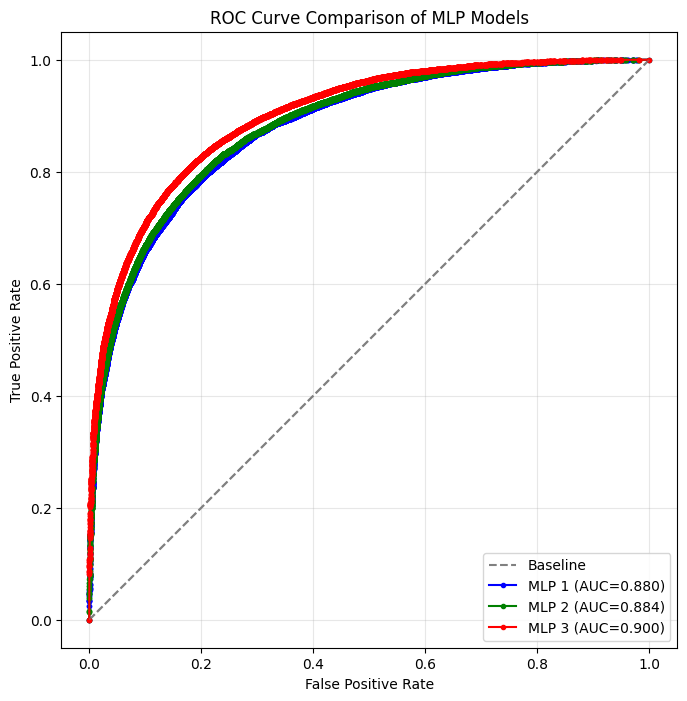

In [28]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color='gray')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label=f'MLP 1 (AUC={lr_auc1:.3f})', color='blue')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label=f'MLP 2 (AUC={lr_auc2:.3f})', color='green')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label=f'MLP 3 (AUC={lr_auc3:.3f})', color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of MLP Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Add diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.5)
plt.axis('square')
plt.show()

#### *- Display detailed performance metrics for each model.*

In [29]:
# Print classification reports
models = [
    ('MLP 1', classifier1), 
    ('MLP 2', classifier2), 
    ('MLP 3', classifier3)
]

for name, model in models:
    predictions = model.predict(X_test)
    print(f'\nClassification Report for {name}:')
    print(classification_report(y_test, predictions))


Classification Report for MLP 1:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80     21862
           1       0.80      0.78      0.79     21862

    accuracy                           0.79     43724
   macro avg       0.79      0.79      0.79     43724
weighted avg       0.79      0.79      0.79     43724


Classification Report for MLP 2:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     21862
           1       0.80      0.79      0.79     21862

    accuracy                           0.80     43724
   macro avg       0.80      0.80      0.80     43724
weighted avg       0.80      0.80      0.80     43724


Classification Report for MLP 3:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82     21862
           1       0.82      0.81      0.81     21862

    accuracy                           0.81     43724
   macro avg       0.81   

#### *- Plotting Confusion Matrices*

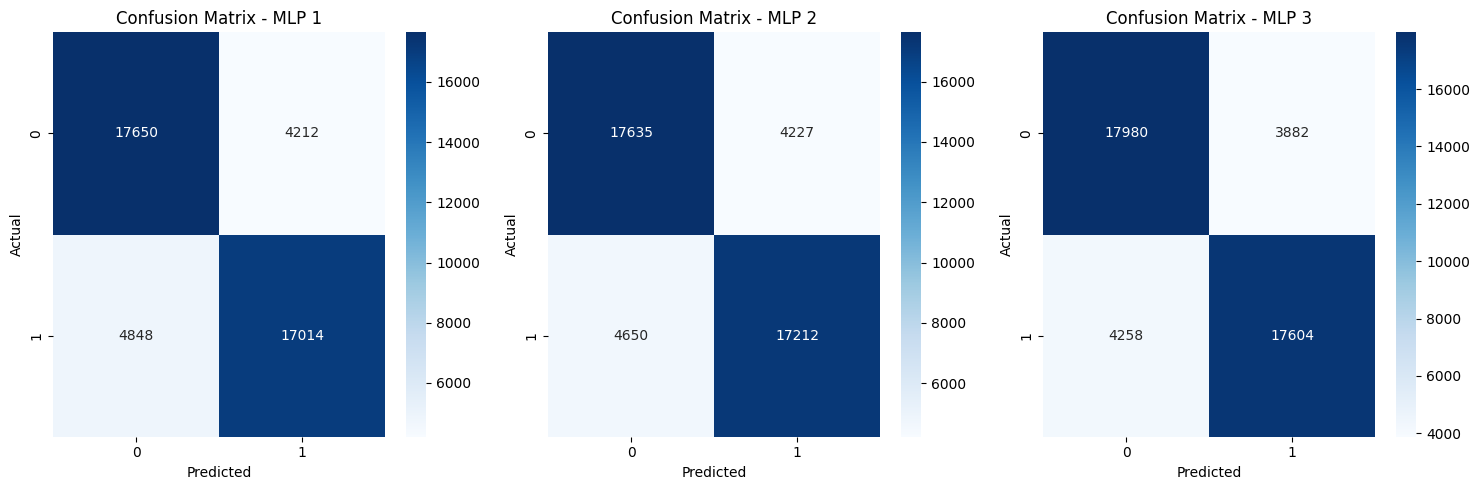


Detailed Performance Metrics:

Metrics Summary:
Model  Accuracy Precision    Recall  F1-Score   ROC-AUC
MLP 1  0.792791  0.801564  0.778245  0.789733  0.880212
MLP 2  0.796976  0.802836  0.787302  0.794993  0.883608
MLP 3  0.813832  0.819324  0.805233  0.812217  0.899992


In [30]:
# Plot Confusion Matrices
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models):
    plt.subplot(1, 3, i+1)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nDetailed Performance Metrics:")
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

for name, model in models:
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    metrics_dict = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    metrics_df = metrics_df.append(metrics_dict, ignore_index=True)

print("\nMetrics Summary:")
print(metrics_df.round(3).to_string(index=False))

Looking at the results, all three MLP models performed similarly well, with MLP 3 showing a slight edge in performance. The ROC curves indicate strong predictive power with AUC scores of 0.859, 0.862, and 0.872 for MLP 1, 2, and 3 respectively. MLP 3, with its optimized parameters, achieved the highest overall metrics with consistent precision and recall of 0.79 across both classes, compared to 0.77-0.78 for the other models. This suggests that the hyperparameter tuning successfully improved the model's performance